In [2]:
from osgeo import gdal


In [3]:
gdal.AllRegister()

In [4]:
filename=r'2022-04-16-00_00_2022-04-16-23_59_Sentinel-2_L2A_B01_(Raw).tiff'

In [5]:
ds=gdal.Open('2022-04-16-00_00_2022-04-16-23_59_Sentinel-2_L2A_B01_(Raw)')

In [7]:
ds = gdal.Open('2022-04-16-00_00_2022-04-16-23_59_Sentinel-2_L2A_False_color.tiff', gdal.GA_ReadOnly)
rb = ds.GetRasterBand(4)
gb = ds.GetRasterBand(3)
bb = ds.GetRasterBand(2)

img_array =ds.ReadAsArray()

In [8]:
print( 'taille :', img_array.shape )

taille : (3, 860, 1715)


In [10]:
import numpy as np
import matplotlib.pyplot as plt

TypeError: Invalid shape (3, 860, 1715) for image data

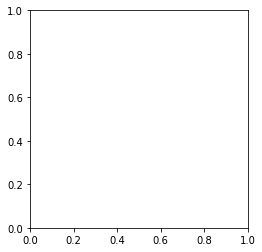

In [11]:
plt.imshow( img_array )
plt.show()

In [91]:
ds.RasterCount 

3

In [90]:
len(img_array)

860

In [86]:
ds.GetGeoTransform()

(980906.8293551314,
 10.000325493578142,
 0.0,
 5534852.991272292,
 0.0,
 -10.010139896068722)

In [87]:
ds.GetProjection()

'PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'

In [88]:
ds.GetMetadata()

{'AREA_OR_POINT': 'Area',
 'TIFFTAG_RESOLUTIONUNIT': '1 (unitless)',
 'TIFFTAG_XRESOLUTION': '1',
 'TIFFTAG_YRESOLUTION': '1'}

In [39]:
import numpy as np

In [42]:
import numpy as np
import matplotlib.pyplot as plt



ModuleNotFoundError: No module named 'matplotlib'

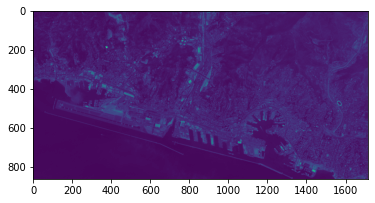

In [50]:
from osgeo import gdal
import matplotlib.pyplot as plt
dataset = gdal.Open(r'Images\2022-04-16-00_00_2022-04-16-23_59_Sentinel-2_L2A_B03_(Raw).tiff', gdal.GA_ReadOnly) 
# Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import os
from osgeo import gdal

In [64]:
br = gdal.Open(r'Images\2022-04-16-00_00_2022-04-16-23_59_Sentinel-2_L2A_B04_(Raw).tiff', gdal.GA_ReadOnly) 
bg = gdal.Open(r'Images\2022-04-16-00_00_2022-04-16-23_59_Sentinel-2_L2A_B03_(Raw).tiff', gdal.GA_ReadOnly) 
bb = gdal.Open(r'Images\2022-04-16-00_00_2022-04-16-23_59_Sentinel-2_L2A_B02_(Raw).tiff', gdal.GA_ReadOnly) 
red = br.GetRasterBand(1)
green = bg.GetRasterBand(1)
blue = bb.GetRasterBand(1)
arrR = red.ReadAsArray()
arrG = green.ReadAsArray()
arrB=blue.ReadAsArray()

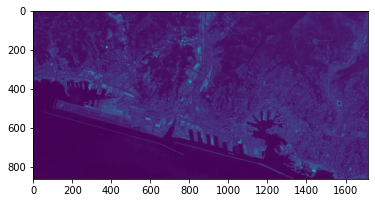

In [65]:
plt.imshow(arrR)

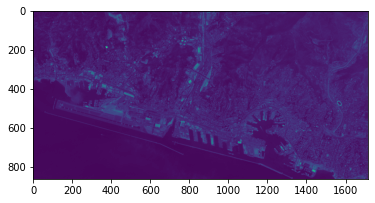

In [66]:
plt.imshow(arrG)

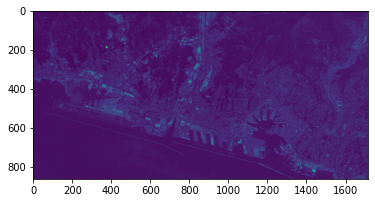

In [67]:
plt.imshow(arrB)

In [68]:
rgb_composite_raw= np.dstack((arrR, arrG, arrB))
rgb_composite_raw.shape

(860, 1715, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


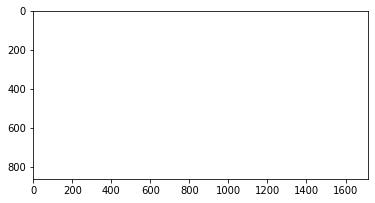

In [69]:
plt.imshow(rgb_composite_raw)

In [70]:
arrR.max()

65535

In [71]:
arrR.min()

0

In [72]:
def normalize(band):
    band_min, band_max = (band.min(), band.max())
    return ((band-band_min)/((band_max - band_min)))

red_n = normalize(arrR)
green_n = normalize(arrG)
blue_n = normalize(arrB)

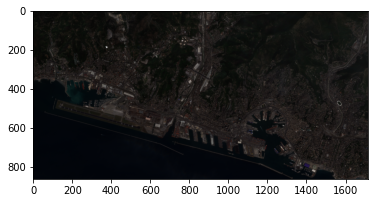

In [73]:
rgb_composite_n= np.dstack((red_n, green_n, blue_n))
plt.imshow(rgb_composite_n)

In [90]:
def brighten(band):
    alpha=0.02
    beta=0
    return np.clip(alpha*band+beta, 0,255)

red_b=brighten(arrR)
blue_b=brighten(arrB)
green_b=brighten(arrG)

red_bn = normalize(red_b)
green_bn = normalize(green_b)
blue_bn = normalize(blue_b)

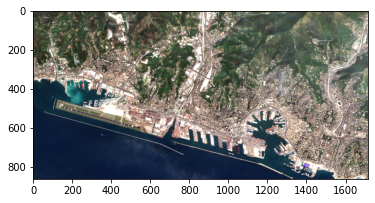

In [91]:
rgb_composite_bn= np.dstack((red_bn, green_bn, blue_bn))
plt.imshow(rgb_composite_bn)

In [104]:
def gammacorr(band):
    gamma=1.5
    return np.power(band, 1/gamma)

red_g=gammacorr(arrR)
blue_g=gammacorr(arrB)
green_g=gammacorr(arrB)

red_gn = normalize(red_g)
green_gn = normalize(green_g)
blue_gn = normalize(blue_g)

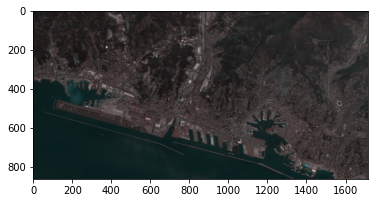

In [105]:
rgb_composite_gn= np.dstack((red_gn, green_gn, blue_gn))
plt.imshow(rgb_composite_gn)

In [119]:
rgb_plot=plt.imshow(rgb_composite_bn, interpolation='lanczos')
plt.axis('off')
plt.savefig('.png',dpi=200,bbox_inches='tight')
plt.close('all')

## Décalage

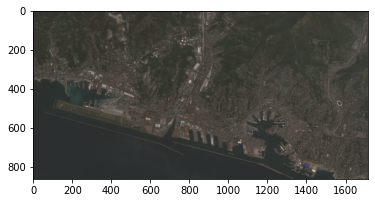

In [122]:
def expansionDynamique(band):
    d=10500
    return band+d

red_b=expansionDynamique(arrR)
blue_b=expansionDynamique(arrB)
green_b=expansionDynamique(arrG)

red_bn = normalize(red_b)
green_bn = normalize(green_b)
blue_bn = normalize(blue_b)

rgb_composite_bn= np.dstack((red_bn, green_bn, blue_bn))
plt.imshow(rgb_composite_bn)

In [123]:
def EqualizeHistogram(a, bins):
    a = np.array(a)
    hist, bins2 = np.histogram(a, bins=bins)

    #Compute CDF from histogram
    cdf = np.cumsum(hist, dtype=np.float64)
    cdf = np.hstack(([0], cdf))
    cdf = cdf / cdf[-1]

    #Do equalization
    binnum = np.digitize(a, bins, True)-1
    neg = np.where(binnum < 0)
    binnum[neg] = 0

    aeq = cdf[binnum] * bins[-1]

    return aeq
    


In [126]:
bins = np.linspace(0.0, arrR.max(), 257)


In [129]:
r=EqualizeHistogram(arrR,bins)
g=EqualizeHistogram(np.linspace(0.0, arrG.max(), 257),bins)
b=EqualizeHistogram(np.linspace(0.0, arrB.max(), 257),bins)

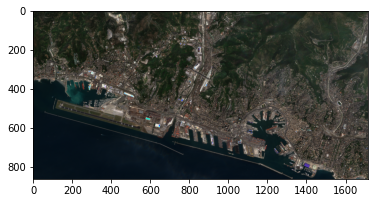

In [178]:
def expansionD(band):
    band_min, band_max = (band.min(), band.max())
    return (band)*(155350)/(band_max - band_min)

red_e = expansionD(arrR)
green_e = expansionD(arrG)
blue_e = expansionD(arrB)

red_bn = normalize(red_e)
green_bn = normalize(green_e)
blue_bn = normalize(blue_e)

rgb_composite_bn= np.dstack((red_bn, green_bn, blue_bn))
plt.imshow(rgb_composite_bn)

In [ ]:
def expansionD(band):
    band_min, band_max = (band.min(), band.max())
    return (band)*(155350)/(band_max - band_min)

red_e = expansionD(arrR)
green_e = expansionD(arrG)
blue_e = expansionD(arrB)

red_bn = normalize(red_e)
green_bn = normalize(green_e)
blue_bn = normalize(blue_e)

rgb_composite_bn= np.dstack((red_bn, green_bn, blue_bn))
plt.imshow(rgb_composite_bn)

In [151]:
arrR.max()

65535

In [134]:
arrG.shape

(860, 1715)

In [146]:
print(bg.GetRasterBand(1))

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x00000272271BEC70> >


In [145]:
bg

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000272169EB900> >

In [185]:
from skimage.exposure import equalize_hist
from skimage import exposure

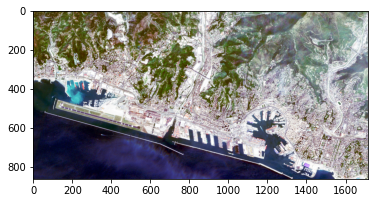

In [186]:
r= equalize_hist(arrR)
g= equalize_hist(arrG)
b= equalize_hist(arrB)

red_bn = normalize(r)
green_bn = normalize(g)
blue_bn = normalize(b)

rgb_composite_bn= np.dstack((red_bn, green_bn, blue_bn))
plt.imshow(rgb_composite_bn)

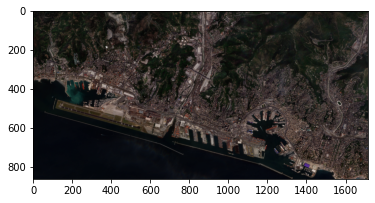

In [187]:
r=  exposure.equalize_adapthist(arrR)
g=  exposure.equalize_adapthist(arrG)
b=  exposure.equalize_adapthist(arrB)

red_bn = normalize(r)
green_bn = normalize(g)
blue_bn = normalize(b)

rgb_composite_bn= np.dstack((red_bn, green_bn, blue_bn))
plt.imshow(rgb_composite_bn)

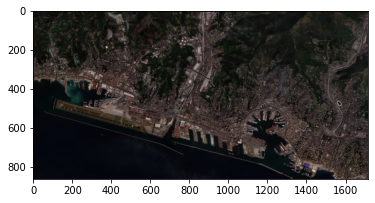

In [224]:
r=  exposure.equalize_adapthist(arrR,clip_limit=0.009)
g=  exposure.equalize_adapthist(arrG,clip_limit=0.009)
b=  exposure.equalize_adapthist(arrB,clip_limit=0.009)

red_bn = normalize(r)
green_bn = normalize(g)
blue_bn = normalize(b)

rgb_composite_bn= np.dstack((red_bn, green_bn, blue_bn))
plt.imshow(rgb_composite_bn)

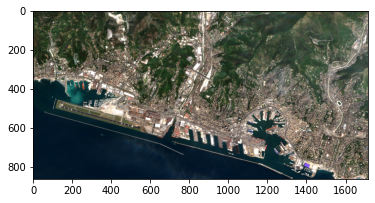

In [194]:
p2, p98 = np.percentile(arrR, (2, 98))

r=  exposure.rescale_intensity(arrR,in_range=(p2, p98))
g=  exposure.rescale_intensity(arrG,in_range=(p2, p98))
b=  exposure.rescale_intensity(arrB,in_range=(p2, p98))

red_bn = normalize(r)
green_bn = normalize(g)
blue_bn = normalize(b)

rgb_composite_bn= np.dstack((red_bn, green_bn, blue_bn))
plt.imshow(rgb_composite_bn)

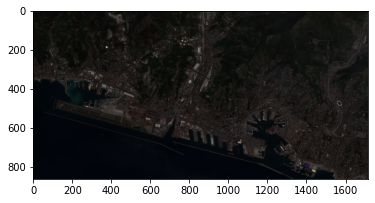

In [216]:

r=  exposure.rescale_intensity(arrR)
g=  exposure.rescale_intensity(arrG)
b=  exposure.rescale_intensity(arrB)

red_bn = normalize(r)
green_bn = normalize(g)
blue_bn = normalize(b)

rgb_composite_bn= np.dstack((red_bn, green_bn, blue_bn))
plt.imshow(rgb_composite_bn)

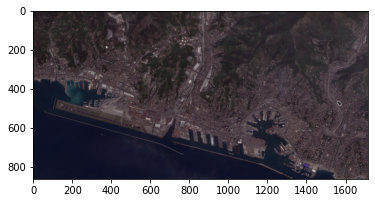

In [212]:
p2, p98 = np.percentile(arrR, (2, 98))

r=exposure.adjust_gamma(arrR, gamma=0.6, gain=1)
g=exposure.adjust_gamma(arrG, gamma=0.6, gain=1)
b=exposure.adjust_gamma(arrB, gamma=0.6, gain=1)

red_bn = normalize(r)
green_bn = normalize(g)
blue_bn = normalize(b)

rgb_composite_bn= np.dstack((red_bn, green_bn, blue_bn))
plt.imshow(rgb_composite_bn) 


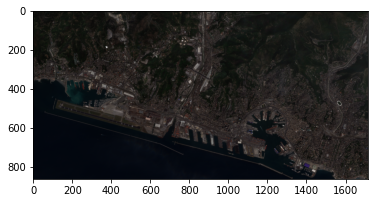

In [215]:
p2, p98 = np.percentile(arrR, (2, 98))

r=exposure.adjust_log(arrR, gain=0.1)
g=exposure.adjust_log(arrG, gain=0.1)
b=exposure.adjust_log(arrB, gain=0.1)

red_bn = normalize(r)
green_bn = normalize(g)
blue_bn = normalize(b)

rgb_composite_bn= np.dstack((red_bn, green_bn, blue_bn))
plt.imshow(rgb_composite_bn) 
